# 7-1初始準備
Keras可以用各種不同的深度學習套件當底層，我可以指定用Tenserflow以確保執行的一致性

%env KERAS_BACKEND=tensorflow

In [94]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

由 Keras 讀入 MNIST

In [95]:
from keras.datasets import mnist

In [96]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [97]:
len(x_train)

60000

In [98]:
len(x_test)

10000

In [99]:
X = x_train[87]

In [100]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [101]:
X.shape

(28, 28)

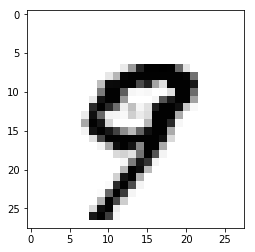

In [102]:
plt.imshow(X, cmap = 'Greys')

In [103]:
y_train[87]

9

In [104]:
x_train.shape

(60000, 28, 28)

In [105]:
x_test.shape

(10000, 28, 28)

In [106]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

1-hot encoding

In [107]:
from keras.utils import np_utils

In [108]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [109]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

建構神經網路

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [111]:
model = Sequential()

In [112]:
# 第一層
model.add(Dense(4, input_dim=784))
model.add(Activation('sigmoid'))

In [113]:
# 第二層
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [114]:
# 輸出
model.add(Dense(10))
model.add(Activation('softmax'))

In [115]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_7 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


# 訓練神經網路
batch_size: 一次訓練幾筆資料, epochs: 共要訓練幾次

In [117]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0903 - acc: 0.1044
Epoch 2/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0901 - acc: 0.1048
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0898 - acc: 0.1078
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0895 - acc: 0.1044
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0894 - acc: 0.1044
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0892 - acc: 0.1044
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0891 - acc: 0.1044
Epoch 8/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0890 - acc: 0.1044
Epoch 9/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0889 - acc: 0.1344
Epoch 10/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0888 - acc: 0.1766

# 試用結果

In [118]:
from ipywidgets import interact_manual

In [119]:
predict = model.predict_classes(x_test)

In [120]:
predict

array([7, 1, 1, ..., 7, 1, 1], dtype=int64)

In [121]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 7


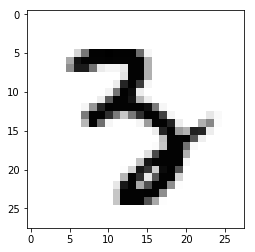

In [122]:
test(87)

In [123]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [124]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 35us/step


In [125]:
print('loss:', score[0])
print('accuracy', score[1])

loss: 0.0870488632440567
accuracy 0.2123


# 存取訓練好的神經網路
conda install h5py

In [126]:
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')